In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-x-ray-10000-images/train_covid19.py
/kaggle/input/covid-19-x-ray-10000-images/covid19.model
/kaggle/input/covid-19-x-ray-10000-images/requirements.txt
/kaggle/input/covid-19-x-ray-10000-images/generate_images.py
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0266-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0253-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0265-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0243-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0217-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0223-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0227-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0235-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0218-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0216-0001.jpeg
/kaggle/input/c

In [42]:
DATASET_DIR = "../input/covid-19-x-ray-10000-images/dataset"
os.listdir(DATASET_DIR)

['normal', 'covid']

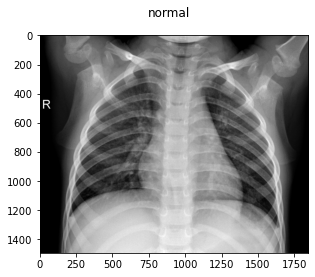

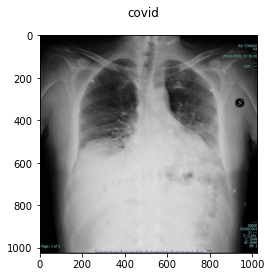

In [43]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

normal_images = []
for img_path in glob.glob(DATASET_DIR + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal_images[0], cmap='gray') 

covid_images = []
for img_path in glob.glob(DATASET_DIR + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('covid')
plt.imshow(covid_images[0], cmap='gray') 

In [44]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 30
BATCH_SIZE = 12

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(validation_split = 0.3)


train_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')


validation_generator = datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

Found 69 images belonging to 2 classes.
Found 29 images belonging to 2 classes.


In [46]:
import tensorflow as tf
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, BatchNormalization,AvgPool2D,MaxPool2D, Dropout

In [47]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [48]:
act = tf.nn.leaky_relu
model = Sequential([
    Conv2D(64, (3,3), input_shape = INPUT_SHAPE, activation=act),
    MaxPooling2D((2,2)),
    Conv2D(16,(3,3), activation = act),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(32, activation = act),
    Dense(1, activation = 'sigmoid')
])

NameError: name 'act' is not defined

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

es = EarlyStopping(monitor = 'loss', mode = 'auto')
rl = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2)
cbs = [rl]

In [ ]:
history = model.fit(train_generator,validation_data = validation_generator, epochs = EPOCHS,callbacks = cbs, batch_size = 32, verbose = 1)